In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

In [22]:
# ch_data = np.loadtxt("/Users/Filip/Desktop/DATA_SCIENCE/GIT-repos/Evolutionary-Algorithms/Evolution-Strategies/model3.txt",usecols=(0, 1), skiprows=1)

# x = ch_data[:,0]
# o = ch_data[:,1]


In [2]:
x = np.array([
       -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. , -3.9,
       -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9, -2.8,
       -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8, -1.7,
       -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6,
       -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
        0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,
        1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,
        2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,
        3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,
        5. 
    ])

In [3]:
o = np.array(
    [140.82144   , 136.80255   , 130.16584   , 123.09854   ,
       114.39532   , 104.59727   ,  96.025621  ,  90.400328  ,
        84.738771  ,  81.702265  ,  79.660375  ,  78.901891  ,
        78.319333  ,  77.792199  ,  76.203148  ,  73.302882  ,
        68.357995  ,  60.673796  ,  53.659575  ,  45.933771  ,
        40.527897  ,  35.071689  ,  32.667226  ,  30.980565  ,
        31.142812  ,  31.947988  ,  32.60861   ,  34.54083   ,
        33.087014  ,  31.259531  ,  26.126994  ,  21.595553  ,
        15.708787  ,   9.6828575 ,   6.3519347 ,   1.7911671 ,
         1.7895385 ,   2.1555959 ,   3.7013691 ,   5.9731705 ,
         9.7150275 ,  10.00916   ,  11.432421  ,   9.9223725 ,
         7.4511493 ,   3.0999315 ,  -1.7130687 ,  -4.954152  ,
        -8.1451161 ,  -7.9157024 ,  -7.7265311 ,  -5.4184115 ,
        -1.0247075 ,   3.1055918 ,   6.4619733 ,  10.332118  ,
        12.17703   ,  11.234617  ,   9.9610569 ,   6.4187102 ,
         3.229897  ,   2.3680728 ,   0.88608265,   2.7783012 ,
         5.3082157 ,   9.9966809 ,  15.789251  ,  20.939401  ,
        26.937442  ,  31.721399  ,  33.030669  ,  33.657274  ,
        33.010668  ,  31.599644  ,  29.644646  ,  30.833292  ,
        32.41725   ,  35.2346    ,  40.404607  ,  45.742281  ,
        53.113719  ,  61.332217  ,  66.598888  ,  73.333123  ,
        76.564083  ,  78.123728  ,  78.311912  ,  79.310875  ,
        79.77859   ,  81.440103  ,  84.696972  ,  89.857463  ,
        97.291561  , 105.03889   , 114.43444   , 123.03707   ,
       130.96645   , 136.87229   , 142.06587   , 144.23329   ]
)

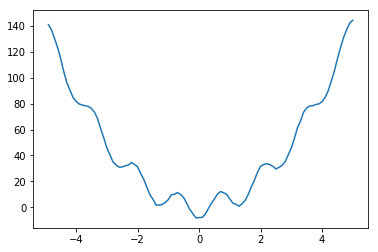

In [4]:
plt.plot(x,o)
plt.show()

In [5]:
def evaluate_final(abc,x,i):
    return (abc[0]*((x[i]**2)-(abc[1]*np.cos(abc[2]*np.pi*x[i]))))


def print_final_result(v):
    N = 100
    abc_best = v
    o_dash_final = np.zeros(N)

    for i in range(N):
        o_dash_final[i] = evaluate_final(abc_best,x,i)
    mse_final = np.mean((o - o_dash_final)**2)

    plt.plot(x, o_dash_final)
    plt.show()

In [6]:
#(MI + LAMBDA)

abc = np.random.uniform(-10, 10, size=(100,3))
sigma = np.random.uniform(0,10, size=(100,3))

tau1 = 1/np.sqrt(2*6)
tau2 = 1/np.sqrt(2*np.sqrt(6))

v = np.stack([abc,sigma])
v.shape

def evaluate(abc,x,i):
    return (abc[0]*((x[i]**2)-(abc[1]*np.cos(abc[2]*np.pi*x[i]))))

def fitness_ABC(abc, N):
    o_dash = np.zeros(N)
    for i in range(100):
        o_dash[i] = evaluate(abc,x,i)
    mes = np.mean((o - o_dash)**2)
    return mes

def evaluate_pop(pop_v):
    fit = np.zeros(len(pop_v[1]))
    for i in range(len(pop_v[1])):
        fit[i] = fitness_ABC(pop_v[0,i,:], 100)
    return fit

iteration = 0

while True:

    v_copy = copy(v)
    parents_fit = evaluate_pop(v)

    idx = np.random.randint(100, size=500)
    R_lambda = v[:,idx,:]
    
    Off_lambda = np.zeros((2,len(R_lambda[1]),3))

    for i in range(len(R_lambda[1])):

        a_off = R_lambda[0,i,0] + R_lambda[1,i,0]*np.random.normal()
        Off_lambda[0,i,0] = a_off
        b_off = R_lambda[0,i,1] + R_lambda[1,i,1]*np.random.normal()
        Off_lambda[0,i,1] = b_off
        c_off = R_lambda[0,i,2] + R_lambda[1,i,2]*np.random.normal()
        Off_lambda[0,i,2] = c_off

        r_sigm1 = tau1 * np.random.normal()
        r_sigm2 = tau2 * np.random.normal(size=3)

        sigma_a_off = R_lambda[1,i,0] * np.exp(r_sigm1) * np.exp(r_sigm2[0])
        Off_lambda[1,i,0] = sigma_a_off
        sigma_b_off = R_lambda[1,i,1] * np.exp(r_sigm1) * np.exp(r_sigm2[1])
        Off_lambda[1,i,1] = sigma_b_off
        sigma_c_off = R_lambda[1,i,2] * np.exp(r_sigm1) * np.exp(r_sigm2[2])
        Off_lambda[1,i,2] = sigma_c_off

    fit_lambda = evaluate_pop(Off_lambda)
    mi_p_lambd = np.concatenate((v_copy, Off_lambda), axis=1)
    mi_p_lambd_mse = np.concatenate((parents_fit, fit_lambda), axis=0)

    choosen_indx = mi_p_lambd_mse.argsort()[:100]
    v = mi_p_lambd[:,choosen_indx,:]

    iteration += 1

    if abs((min(parents_fit) - min(fit_lambda))) < 1e-6:
        print(min(fit_lambda),iteration)
        break

0.22841791224717997 36


In [7]:
#(MI,LAMBDA)

abc = np.random.uniform(-10, 10, size=(100,3))
sigma = np.random.uniform(0,10, size=(100,3))

tau1 = 1/np.sqrt(2*6)
tau2 = 1/np.sqrt(2*np.sqrt(6))

v = np.stack([abc,sigma])
v.shape

def evaluate(abc,x,i):
    return (abc[0]*((x[i]**2)-(abc[1]*np.cos(abc[2]*np.pi*x[i]))))

def fitness_ABC(abc, N):
    o_dash = np.zeros(N)
    for i in range(100):
        o_dash[i] = evaluate(abc,x,i)
    mes = np.mean((o - o_dash)**2)
    return mes

def evaluate_pop(pop_v):
    fit = np.zeros(len(pop_v[1]))
    for i in range(len(pop_v[1])):
        fit[i] = fitness_ABC(pop_v[0,i,:], 100)
    return fit

iteration = 0

while True:
    
    v_copy = copy(v)
    parents_fit = evaluate_pop(v)

    idx = np.random.randint(100, size=500)
    R_lambda = v[:,idx,:]
    
    Off_lambda = np.zeros((2,len(R_lambda[1]),3))

    for i in range(len(R_lambda[1])):

        a_off = R_lambda[0,i,0] + R_lambda[1,i,0]*np.random.normal()
        Off_lambda[0,i,0] = a_off
        b_off = R_lambda[0,i,1] + R_lambda[1,i,1]*np.random.normal()
        Off_lambda[0,i,1] = b_off
        c_off = R_lambda[0,i,2] + R_lambda[1,i,2]*np.random.normal()
        Off_lambda[0,i,2] = c_off

        r_sigm1 = tau1 * np.random.normal()
        r_sigm2 = tau2 * np.random.normal(size=3)

        sigma_a_off = R_lambda[1,i,0] * np.exp(r_sigm1) * np.exp(r_sigm2[0])
        Off_lambda[1,i,0] = sigma_a_off
        sigma_b_off = R_lambda[1,i,1] * np.exp(r_sigm1) * np.exp(r_sigm2[1])
        Off_lambda[1,i,1] = sigma_b_off
        sigma_c_off = R_lambda[1,i,2] * np.exp(r_sigm1) * np.exp(r_sigm2[2])
        Off_lambda[1,i,2] = sigma_c_off

    fit_lambda = evaluate_pop(Off_lambda)
    choosen_indx = fit_lambda.argsort()[:100]
    v = Off_lambda[:,choosen_indx,:]
    
    iteration += 1

    if abs((min(parents_fit) - min(fit_lambda))) < 1e-6:
        print(min(fit_lambda),iteration)
        break

0.22841776030483718 38
